# Trading Bot Using Reinforcement Learning

### __0.INTRODUCTION__
This project makes use of reinforcement learning algorithms from stable baselines 3 api and here the agent is trained on gym-anytrading enviromnment where I have fed custom signals. The model was trained on PPO,PPO2,DQN,A2C for various hyper parameters out of which PPO performed the best. 
I have drawn inspiration from the [quantiacs](https://quantiacs.com) websites and their blogs. 

### __DATA__
I have used [apple stocks](https://www.marketwatch.com/investing/stock/aapl/download-datastartDate=8/12/2021&endDate=8/12/2022) over a year starting from 12th August 2021 to 12th August 2022. 




### __1.IMPORTING LIBRARIES__
Here I will import the libraries that I will be using in my notebook. Libraries are essentially extensions to Python that consist of functions that are handy to have when we are performing our analysis.

In [1]:
# Gym stuff
import gym
import gym_anytrading

# Stable baselines - rl stuff
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import PPO

# Processing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

#FINTA is a library that will help in calculating technical indicators  
from gym_anytrading.envs import StocksEnv
from finta import TA

### __2.IMPORTING AND READING DATA__
Now import the apple stock price dataset as mentioned in the introduction. 

In [2]:
df = pd.read_csv('/Users/raunakpandey/rl-test/aapl/AAPL.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume
0,08/11/2022,170.06,170.99,168.19,168.49,"57,149,160"
1,08/10/2022,167.68,169.34,166.90,169.24,"70,170,547"
2,08/09/2022,164.02,165.82,163.25,164.92,"63,135,500"
3,08/08/2022,166.37,167.81,164.20,164.87,"60,362,340"
4,08/05/2022,163.21,165.85,163.00,165.35,"56,696,992"


### __3.DATA PREPROCESSING__
Data preprocessing is the process of getting our dataset ready for model training. Here we will convert Date and Volume into datetime and float respectively and rearrange data in ascending order.  

In [4]:
# Converting Date column into datetime format of pandas
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume            object
dtype: object

In [5]:
# Rearranging Data according to date
df.sort_values('Date', ascending=True, inplace=True)
df.head()

,Date,Open,High,Low,Close,Volume
251,2021-08-12,146.19,149.05,145.84,148.89,"73,779,109"
250,2021-08-13,148.97,149.44,148.27,149.10,"59,375,008"
249,2021-08-16,148.54,151.19,146.47,151.12,"103,558,797"
248,2021-08-17,150.23,151.68,149.09,150.19,"92,229,742"
247,2021-08-18,149.80,150.72,146.15,146.36,"86,325,992"


In [6]:
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2021-08-12,146.19,149.05,145.84,148.89,"73,779,109"
2021-08-13,148.97,149.44,148.27,149.10,"59,375,008"
2021-08-16,148.54,151.19,146.47,151.12,"103,558,797"
2021-08-17,150.23,151.68,149.09,150.19,"92,229,742"
2021-08-18,149.80,150.72,146.15,146.36,"86,325,992"


In [7]:
# Converting Volume column items from string to float
df['Volume'] = df['Volume'].apply(lambda x: float(x.replace(",", "")))

In [8]:
df.dtypes

Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object

### __4.ENVIROMENT CREATION__
Next we initialise our envirnment and then test it for random actions of the bot. 

In [9]:
# CREATING THE ENVIRONMENT
env = gym.make('stocks-v0', df=df, frame_bound=(5,250), window_size=5)

In [10]:
env.signal_features

array([[ 1.4889e+02,  0.0000e+00],
       [ 1.4910e+02,  2.1000e-01],
       [ 1.5112e+02,  2.0200e+00],
       [ 1.5019e+02, -9.3000e-01],
       [ 1.4636e+02, -3.8300e+00],
       [ 1.4670e+02,  3.4000e-01],
       [ 1.4819e+02,  1.4900e+00],
       [ 1.4971e+02,  1.5200e+00],
       [ 1.4962e+02, -9.0000e-02],
       [ 1.4836e+02, -1.2600e+00],
       [ 1.4754e+02, -8.2000e-01],
       [ 1.4860e+02,  1.0600e+00],
       [ 1.5312e+02,  4.5200e+00],
       [ 1.5183e+02, -1.2900e+00],
       [ 1.5251e+02,  6.8000e-01],
       [ 1.5365e+02,  1.1400e+00],
       [ 1.5430e+02,  6.5000e-01],
       [ 1.5669e+02,  2.3900e+00],
       [ 1.5511e+02, -1.5800e+00],
       [ 1.5407e+02, -1.0400e+00],
       [ 1.4897e+02, -5.1000e+00],
       [ 1.4955e+02,  5.8000e-01],
       [ 1.4812e+02, -1.4300e+00],
       [ 1.4903e+02,  9.1000e-01],
       [ 1.4879e+02, -2.4000e-01],
       [ 1.4606e+02, -2.7300e+00],
       [ 1.4294e+02, -3.1200e+00],
       [ 1.4343e+02,  4.9000e-01],
       [ 1.4585e+02,

The environment has 2 action spaces:
1. Short
2. Long

In [11]:
env.action_space

Discrete(2)

info {'total_reward': -20.629999999999995, 'total_profit': 0.31953391621155436, 'position': 1}


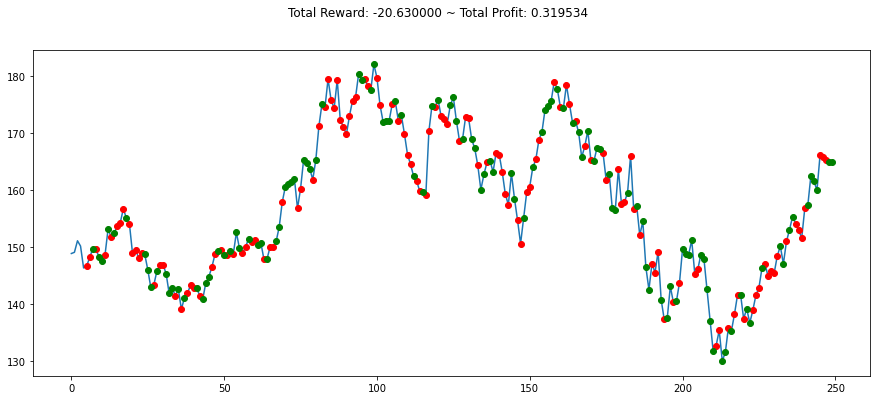

In [12]:
#Allowing the bot to take random actions without any trading 

state = env.reset()
while True: 
    action = env.action_space.sample()
    n_state, reward, done, info = env.step(action)
    if done: 
        print("info", info)
        break
        
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

Here the green dots mean the bot has decided to opt for long position and red means it has chosen to short.

### __5.FEATURE ENGINEERING__
Feature engineering is arguably the most important art in machine learning. It is the process of creating new features from existing features to better represent the underlying problem to the predictive models resulting in improved model accuracy on unseen data.
In this section I have created 3 features:
1. __SMA__ : Simple moving average
2. __RSI__ : Relative Strength Index
3. __OBV__ : On-Balance Volume

__Description of various technical indicators:__

1. [Simple Moving Average](https://www.investopedia.com/terms/s/sma.asp): A simple moving average (SMA) calculates the average of a selected range of prices, usually closing prices, by the number of periods in that range.
2. [Relative Strength Index](https://www.investopedia.com/terms/r/rsi.asp): RSI measures the speed and magnitude of a security's recent price changes to evaluate overvalued or undervalued conditions in the price of that security.
3. [On Balance Volume](https://www.investopedia.com/terms/o/onbalancevolume.asp): On-balance volume (OBV) is a technical trading momentum indicator that uses volume flow to predict changes in stock price


In [13]:
df['SMA'] = TA.SMA(df, 12)
df['RSI'] = TA.RSI(df)
df['OBV'] = TA.OBV(df)
df.fillna(0, inplace=True)

In [14]:
df.head(10)

,Open,High,Low,Close,Volume,SMA,RSI,OBV
Date,,,,,,,,
2021-08-12,146.19,149.05,145.84,148.89,73779109.0,0.0,0.000000,0.0
2021-08-13,148.97,149.44,148.27,149.10,59375008.0,0.0,100.000000,59375008.0
2021-08-16,148.54,151.19,146.47,151.12,103558797.0,0.0,100.000000,162933805.0
2021-08-17,150.23,151.68,149.09,150.19,92229742.0,0.0,68.862848,70704063.0
2021-08-18,149.80,150.72,146.15,146.36,86325992.0,0.0,28.922370,-15621929.0
2021-08-19,145.03,148.00,144.50,146.70,86960312.0,0.0,32.656494,71338383.0
2021-08-20,147.44,148.50,146.78,148.19,60549633.0,0.0,46.036296,131888016.0
2021-08-23,148.31,150.19,147.89,149.71,60131809.0,0.0,55.704678,192019825.0
2021-08-24,149.45,150.86,149.15,149.62,48606434.0,0.0,55.075471,143413391.0


In [15]:
#Adding Custom Signals to the environment
def add_signals(env):
    start = env.frame_bound[0] - env.window_size
    end = env.frame_bound[1]
    prices = env.df.loc[:, 'Low'].to_numpy()[start:end]
    signal_features = env.df.loc[:, ['Low', 'Volume','SMA', 'RSI', 'OBV']].to_numpy()[start:end]
    return prices, signal_features

In [16]:
class MyCustomEnv(StocksEnv):
    _process_data = add_signals
    
env2 = MyCustomEnv(df=df, window_size=12, frame_bound=(12,50))

In [17]:
# Checking New Features
env2.signal_features

array([[ 1.45840000e+02,  7.37791090e+07,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 1.48270000e+02,  5.93750080e+07,  0.00000000e+00,
         1.00000000e+02,  5.93750080e+07],
       [ 1.46470000e+02,  1.03558797e+08,  0.00000000e+00,
         1.00000000e+02,  1.62933805e+08],
       [ 1.49090000e+02,  9.22297420e+07,  0.00000000e+00,
         6.88628483e+01,  7.07040630e+07],
       [ 1.46150000e+02,  8.63259920e+07,  0.00000000e+00,
         2.89223697e+01, -1.56219290e+07],
       [ 1.44500000e+02,  8.69603120e+07,  0.00000000e+00,
         3.26564945e+01,  7.13383830e+07],
       [ 1.46780000e+02,  6.05496330e+07,  0.00000000e+00,
         4.60362961e+01,  1.31888016e+08],
       [ 1.47890000e+02,  6.01318090e+07,  0.00000000e+00,
         5.57046784e+01,  1.92019825e+08],
       [ 1.49150000e+02,  4.86064340e+07,  0.00000000e+00,
         5.50754709e+01,  1.43413391e+08],
       [ 1.47800000e+02,  5.89913010e+07,  0.00000000e+00,
         4.70609806e+01

In [18]:
df.head()

,Open,High,Low,Close,Volume,SMA,RSI,OBV
Date,,,,,,,,
2021-08-12,146.19,149.05,145.84,148.89,73779109.0,0.0,0.000000,0.0
2021-08-13,148.97,149.44,148.27,149.10,59375008.0,0.0,100.000000,59375008.0
2021-08-16,148.54,151.19,146.47,151.12,103558797.0,0.0,100.000000,162933805.0
2021-08-17,150.23,151.68,149.09,150.19,92229742.0,0.0,68.862848,70704063.0
2021-08-18,149.80,150.72,146.15,146.36,86325992.0,0.0,28.922370,-15621929.0


### __6.Training And Saving Model__
Training the model every time takes a lot of time so, its better to save and load the model again. 

## PPO

In [19]:
# Create Directory if not already present
import os
models_dir = "models/PPO"
logdir = "logs"

if not os.path.exists(models_dir):
    os.makedirs(models_dir)

if not os.path.exists(logdir):
    os.makedirs(logdir)

In [20]:
env_maker = lambda: env2
from stable_baselines3.common.monitor import Monitor
env = Monitor(env, logdir)
env = DummyVecEnv([env_maker])

In [21]:
# After several iterations, the model PPO with multi layer perceptron policy turned out be best fit
model = PPO('MlpPolicy', env, verbose=1, tensorboard_log=logdir)

Using cpu device


In [22]:
#Training and Saving the model after every 10,000 iterations for a total of 500,000 timesteps
TIMESTEPS = 10000
iters = 0
for i in range(50):
    model.learn(total_timesteps=TIMESTEPS, reset_num_timesteps=False, tb_log_name="PPO")
    model.save(f"{models_dir}/{TIMESTEPS*i}")

Logging to logs/PPO_0
-----------------------------
| time/              |      |
|    fps             | 6926 |
|    iterations      | 1    |
|    time_elapsed    | 0    |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 5042        |
|    iterations           | 2           |
|    time_elapsed         | 0           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.012635494 |
|    clip_fraction        | 0.131       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.684      |
|    explained_variance   | 0.124       |
|    learning_rate        | 0.0003      |
|    loss                 | 2.28        |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0211     |
|    value_loss           | 7.05        |
-----------------------------------------
------------

------------------------------------------
| time/                   |              |
|    fps                  | 4657         |
|    iterations           | 4            |
|    time_elapsed         | 1            |
|    total_timesteps      | 28672        |
| train/                  |              |
|    approx_kl            | 0.0064444235 |
|    clip_fraction        | 0.0604       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.161       |
|    explained_variance   | 0.948        |
|    learning_rate        | 0.0003       |
|    loss                 | 0.32         |
|    n_updates            | 130          |
|    policy_gradient_loss | -0.00907     |
|    value_loss           | 0.93         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 4556         |
|    iterations           | 5            |
|    time_elapsed         | 2            |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 5678         |
|    iterations           | 2            |
|    time_elapsed         | 0            |
|    total_timesteps      | 55296        |
| train/                  |              |
|    approx_kl            | 0.0033478905 |
|    clip_fraction        | 0.0346       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.0681      |
|    explained_variance   | 0.993        |
|    learning_rate        | 0.0003       |
|    loss                 | 0.15         |
|    n_updates            | 260          |
|    policy_gradient_loss | -0.00439     |
|    value_loss           | 0.136        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 5063         |
|    iterations           | 3            |
|    time_elapsed         | 1            |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 4816         |
|    iterations           | 4            |
|    time_elapsed         | 1            |
|    total_timesteps      | 79872        |
| train/                  |              |
|    approx_kl            | 0.0014504562 |
|    clip_fraction        | 0.00811      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.0248      |
|    explained_variance   | 0.996        |
|    learning_rate        | 0.0003       |
|    loss                 | 0.00959      |
|    n_updates            | 380          |
|    policy_gradient_loss | -0.00156     |
|    value_loss           | 0.0816       |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 4683        |
|    iterations           | 5           |
|    time_elapsed         | 2           |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 5612         |
|    iterations           | 2            |
|    time_elapsed         | 0            |
|    total_timesteps      | 106496       |
| train/                  |              |
|    approx_kl            | 0.0054715984 |
|    clip_fraction        | 0.00713      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.0373      |
|    explained_variance   | 0.992        |
|    learning_rate        | 0.0003       |
|    loss                 | 0.00171      |
|    n_updates            | 510          |
|    policy_gradient_loss | -0.00758     |
|    value_loss           | 0.155        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 5051         |
|    iterations           | 3            |
|    time_elapsed         | 1            |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 4676        |
|    iterations           | 5           |
|    time_elapsed         | 2           |
|    total_timesteps      | 133120      |
| train/                  |             |
|    approx_kl            | 0.013949844 |
|    clip_fraction        | 0.0328      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.0365     |
|    explained_variance   | 0.995       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0025     |
|    n_updates            | 640         |
|    policy_gradient_loss | -0.0108     |
|    value_loss           | 0.0815      |
-----------------------------------------
Logging to logs/PPO_0
-------------------------------
| time/              |        |
|    fps             | 8892   |
|    iterations      | 1      |
|    time_elapsed    | 0      |
|    total_timesteps | 135168 |
------------------------------

-----------------------------------------
| time/                   |             |
|    fps                  | 5020        |
|    iterations           | 3           |
|    time_elapsed         | 1           |
|    total_timesteps      | 159744      |
| train/                  |             |
|    approx_kl            | 0.016575715 |
|    clip_fraction        | 0.0352      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.0331     |
|    explained_variance   | 0.994       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.173       |
|    n_updates            | 770         |
|    policy_gradient_loss | -0.00485    |
|    value_loss           | 0.132       |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 4775         |
|    iterations           | 4            |
|    time_elapsed         | 1            |
|    total_timesteps      | 1

Logging to logs/PPO_0
-------------------------------
| time/              |        |
|    fps             | 8775   |
|    iterations      | 1      |
|    time_elapsed    | 0      |
|    total_timesteps | 186368 |
-------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 5650       |
|    iterations           | 2          |
|    time_elapsed         | 0          |
|    total_timesteps      | 188416     |
| train/                  |            |
|    approx_kl            | 0.01757637 |
|    clip_fraction        | 0.0488     |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.0404    |
|    explained_variance   | 0.992      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.00604    |
|    n_updates            | 910        |
|    policy_gradient_loss | -0.00896   |
|    value_loss           | 0.173      |
----------------------------------------
----------------

------------------------------------------
| time/                   |              |
|    fps                  | 4770         |
|    iterations           | 4            |
|    time_elapsed         | 1            |
|    total_timesteps      | 212992       |
| train/                  |              |
|    approx_kl            | 0.0060416963 |
|    clip_fraction        | 0.0121       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.0128      |
|    explained_variance   | 0.999        |
|    learning_rate        | 0.0003       |
|    loss                 | -0.00695     |
|    n_updates            | 1030         |
|    policy_gradient_loss | -0.00444     |
|    value_loss           | 0.0296       |
------------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 4639      |
|    iterations           | 5         |
|    time_elapsed         | 2         |
|    total_timesteps      

------------------------------------------
| time/                   |              |
|    fps                  | 5597         |
|    iterations           | 2            |
|    time_elapsed         | 0            |
|    total_timesteps      | 239616       |
| train/                  |              |
|    approx_kl            | 0.0025447686 |
|    clip_fraction        | 0.01         |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.0319      |
|    explained_variance   | 0.983        |
|    learning_rate        | 0.0003       |
|    loss                 | 0.421        |
|    n_updates            | 1160         |
|    policy_gradient_loss | -0.0026      |
|    value_loss           | 0.326        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 5018         |
|    iterations           | 3            |
|    time_elapsed         | 1            |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 4633         |
|    iterations           | 5            |
|    time_elapsed         | 2            |
|    total_timesteps      | 266240       |
| train/                  |              |
|    approx_kl            | 0.0068738135 |
|    clip_fraction        | 0.00381      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.0221      |
|    explained_variance   | 0.976        |
|    learning_rate        | 0.0003       |
|    loss                 | 0.0152       |
|    n_updates            | 1290         |
|    policy_gradient_loss | -0.00373     |
|    value_loss           | 0.105        |
------------------------------------------
Logging to logs/PPO_0
-------------------------------
| time/              |        |
|    fps             | 8634   |
|    iterations      | 1      |
|    time_elapsed    | 0      |
|    total_timesteps | 268288 |
------------

------------------------------------------
| time/                   |              |
|    fps                  | 5033         |
|    iterations           | 3            |
|    time_elapsed         | 1            |
|    total_timesteps      | 292864       |
| train/                  |              |
|    approx_kl            | 0.0038304513 |
|    clip_fraction        | 0.0288       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.0242      |
|    explained_variance   | 0.996        |
|    learning_rate        | 0.0003       |
|    loss                 | 0.014        |
|    n_updates            | 1420         |
|    policy_gradient_loss | -0.00487     |
|    value_loss           | 0.0508       |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 4788        |
|    iterations           | 4           |
|    time_elapsed         | 1           |
|    total_times

Logging to logs/PPO_0
-------------------------------
| time/              |        |
|    fps             | 8649   |
|    iterations      | 1      |
|    time_elapsed    | 0      |
|    total_timesteps | 319488 |
-------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 5634        |
|    iterations           | 2           |
|    time_elapsed         | 0           |
|    total_timesteps      | 321536      |
| train/                  |             |
|    approx_kl            | 0.010642748 |
|    clip_fraction        | 0.0441      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.042      |
|    explained_variance   | 0.961       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.372       |
|    n_updates            | 1560        |
|    policy_gradient_loss | -0.012      |
|    value_loss           | 0.844       |
----------------------------------------

-----------------------------------------
| time/                   |             |
|    fps                  | 4759        |
|    iterations           | 4           |
|    time_elapsed         | 1           |
|    total_timesteps      | 346112      |
| train/                  |             |
|    approx_kl            | 0.007113371 |
|    clip_fraction        | 0.0397      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.0392     |
|    explained_variance   | 0.952       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.486       |
|    n_updates            | 1680        |
|    policy_gradient_loss | -0.009      |
|    value_loss           | 0.877       |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 4618        |
|    iterations           | 5           |
|    time_elapsed         | 2           |
|    total_timesteps      | 348160

-----------------------------------------
| time/                   |             |
|    fps                  | 5426        |
|    iterations           | 2           |
|    time_elapsed         | 0           |
|    total_timesteps      | 372736      |
| train/                  |             |
|    approx_kl            | 0.012162425 |
|    clip_fraction        | 0.00503     |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.0204     |
|    explained_variance   | 0.987       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.101       |
|    n_updates            | 1810        |
|    policy_gradient_loss | -0.00523    |
|    value_loss           | 0.246       |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 4895        |
|    iterations           | 3           |
|    time_elapsed         | 1           |
|    total_timesteps      | 374784

-----------------------------------------
| time/                   |             |
|    fps                  | 4458        |
|    iterations           | 5           |
|    time_elapsed         | 2           |
|    total_timesteps      | 399360      |
| train/                  |             |
|    approx_kl            | 0.023716483 |
|    clip_fraction        | 0.0745      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.0347     |
|    explained_variance   | 0.987       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.118       |
|    n_updates            | 1940        |
|    policy_gradient_loss | -0.0131     |
|    value_loss           | 0.215       |
-----------------------------------------
Logging to logs/PPO_0
-------------------------------
| time/              |        |
|    fps             | 8430   |
|    iterations      | 1      |
|    time_elapsed    | 0      |
|    total_timesteps | 401408 |
------------------------------

------------------------------------------
| time/                   |              |
|    fps                  | 4861         |
|    iterations           | 3            |
|    time_elapsed         | 1            |
|    total_timesteps      | 425984       |
| train/                  |              |
|    approx_kl            | 0.0070444425 |
|    clip_fraction        | 0.0609       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.0651      |
|    explained_variance   | 0.989        |
|    learning_rate        | 0.0003       |
|    loss                 | 0.0776       |
|    n_updates            | 2070         |
|    policy_gradient_loss | -0.0157      |
|    value_loss           | 0.18         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 4624        |
|    iterations           | 4           |
|    time_elapsed         | 1           |
|    total_times

Logging to logs/PPO_0
-------------------------------
| time/              |        |
|    fps             | 8716   |
|    iterations      | 1      |
|    time_elapsed    | 0      |
|    total_timesteps | 452608 |
-------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 5653        |
|    iterations           | 2           |
|    time_elapsed         | 0           |
|    total_timesteps      | 454656      |
| train/                  |             |
|    approx_kl            | 0.032778498 |
|    clip_fraction        | 0.0278      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.0182     |
|    explained_variance   | 0.998       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0116      |
|    n_updates            | 2210        |
|    policy_gradient_loss | -0.0121     |
|    value_loss           | 0.0426      |
----------------------------------------

-----------------------------------------
| time/                   |             |
|    fps                  | 4790        |
|    iterations           | 4           |
|    time_elapsed         | 1           |
|    total_timesteps      | 479232      |
| train/                  |             |
|    approx_kl            | 0.004417555 |
|    clip_fraction        | 0.0424      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.0702     |
|    explained_variance   | 0.983       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0704      |
|    n_updates            | 2330        |
|    policy_gradient_loss | -0.00825    |
|    value_loss           | 0.122       |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 4655         |
|    iterations           | 5            |
|    time_elapsed         | 2            |
|    total_timesteps      | 4

------------------------------------------
| time/                   |              |
|    fps                  | 5619         |
|    iterations           | 2            |
|    time_elapsed         | 0            |
|    total_timesteps      | 505856       |
| train/                  |              |
|    approx_kl            | 0.0022247874 |
|    clip_fraction        | 0.0315       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.0631      |
|    explained_variance   | 0.968        |
|    learning_rate        | 0.0003       |
|    loss                 | 0.311        |
|    n_updates            | 2460         |
|    policy_gradient_loss | -0.00508     |
|    value_loss           | 0.523        |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 5038        |
|    iterations           | 3           |
|    time_elapsed         | 1           |
|    total_times

Using the magic command to see the tensor board logs, to find out the best saved version of the PPO algorithm.I 
have used 290,000 iterations model as it has explained variance closest to 1 and values loss is also very close to 0

In [23]:
%load_ext tensorboard
%tensorboard --logdir logs

In [24]:
# Testing the model on the training dataset and plotting it
env = MyCustomEnv(df=df, window_size=12, frame_bound=(20,100))
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': 34.84999999999994, 'total_profit': 0.9779639909560485, 'position': 1}


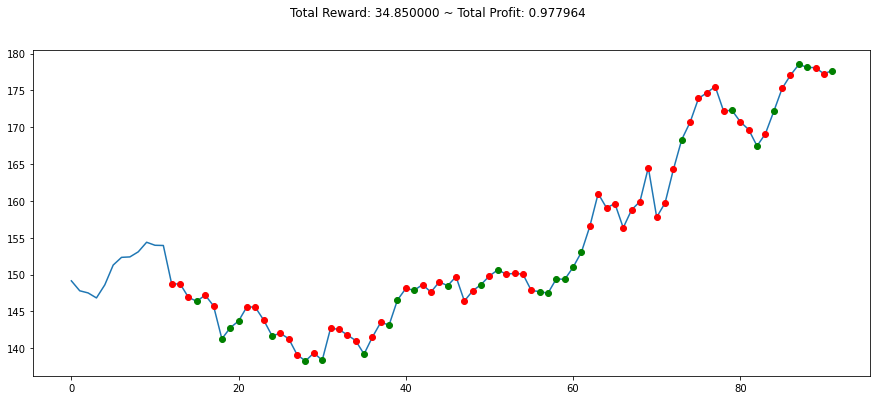

In [25]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

Here the green dots mean the bot has decided to opt for long position and red means it has chosen to short.